In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [1]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

/home/admin/anaconda3/envs/kitchen/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.1'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
# FiGS examples (scene_name, course_name)
cohort = "general"              # cohort name
method = "alpha"                # method name
Nep_his,Nep_com = 5,5           # history epochs,command epochs

flights = [
    ('backroom','line'),        # scene, course
    ]

roster = [
    "Viper",                    # HP-Net
    "Maverick",                 # SV-Net (unified)
    "Iceman",                   # SV-Net (shared)
    "Hangman",                  # SV-Net (unified) + forces
    "Rooster",                  # Vitamin
    ]

Cohort : general
Method : alpha
Policy : vrmpc_fr
Frame  : carl
Flights: [('backroom', 'line')]
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/backroom/splatfacto/2025-01-27_154051/nerfstudio_models/step-000006000.ckpt

--------------------------------------------------------------------------
Course Name : line
Rollout Reps: 5 (per time point)
Rollout Rate: 3 (per second)
Rollout Data: 40 (per sample)
--------------------------------------------------------------------------
Total Rollouts: 90
Batch Sizes : 1 x 50 + 1 x 40
Total Data: 3600
--------------------------------------------------------------------------


  0%|          | 0/2 [00:00<?, ?it/s]

/home/admin/anaconda3/envs/kitchen/lib/python3.10/site-packages/torch/_inductor/compile_fx.py:135: UserWarning: TensorFloat32 tensor cores for float32 matrix multiplication available but not enabled. Consider setting `torch.set_float32_matmul_precision('high')` for better performance.
  warnings.warn(


--------------------------------------------------------------------------
Generated  3600  points of data.
--------------------------------------------------------------------------
Only 40 samples available in trajectories001.pt. Showing all samples.


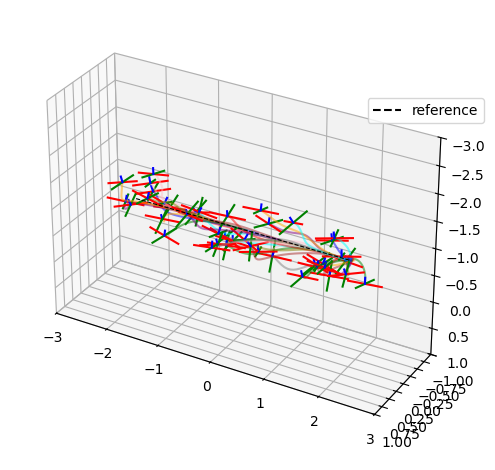

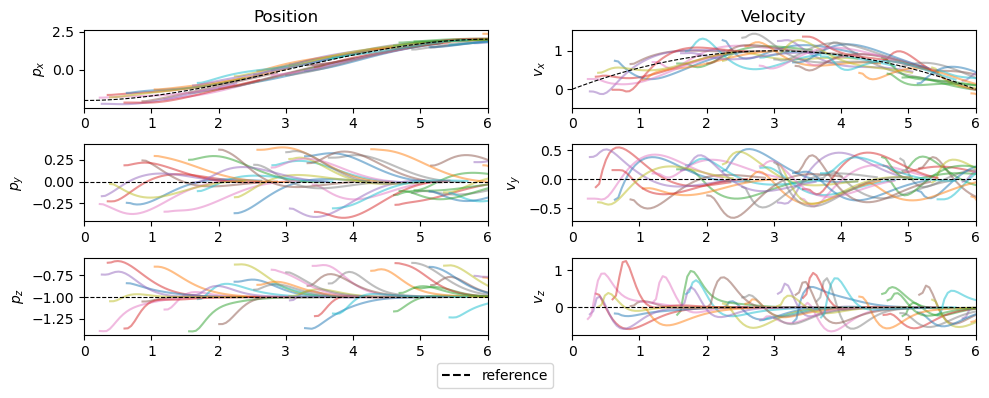

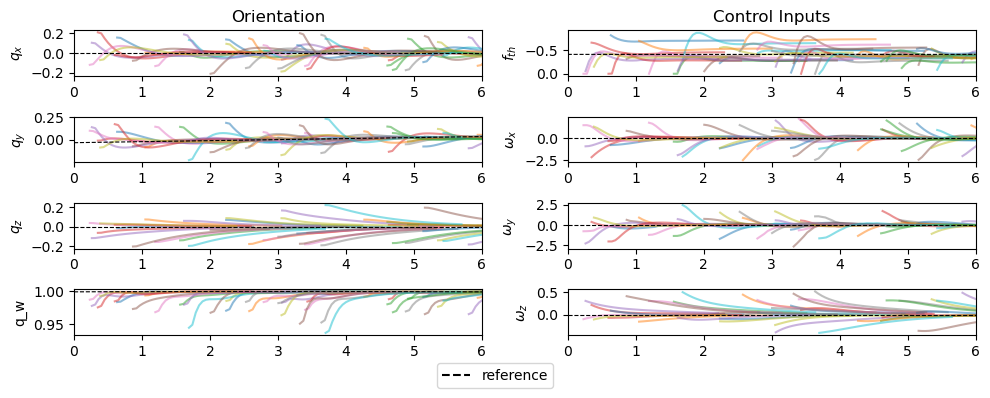

In [3]:
# Generate Rollouts
# rg.generate_rollout_data(cohort,method,flights)
rg.generate_rollout_data(cohort,method,flights,rollout_forced="external")

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [4]:
# Generate Observations
og.generate_observation_data(cohort,roster)

# Review the Observation Data
ps.plot_observation_data(cohort,roster)

/home/admin/anaconda3/envs/kitchen/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Pilot Name  : Viper
Augmentation: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
            :                        +/-
            : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Subsample   : 1 in 1
------------------------------------------------------------------------------------------
Data Counts ------------------------------------------------------------------------------
Extracted 3600 observations from 1 course(s).
Pilot Name  : Maverick
Augmentation: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
            :                        +/-
            : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Subsample   : 1 in 1
------------------------------------------------------------------------------------------
Data Counts ------------------------------------------------------------------------------
Extracted 3600 observations from 1 course(s).
Pilot Name  : Iceman
Augmentation: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
            :                  

In [ ]:
# Train the History Network
tp.train_roster(cohort,roster,"Parameter",Nep_his,lim_sv=10)

# Review Losses
pl.plot_losses(cohort,roster,"Parameter")

In [ ]:
# Train the Command Network
tp.train_roster(cohort,roster,"Commander",Nep_com,lim_sv=10)

# Review Losses
pl.plot_losses(cohort,roster,"Commander")

In [ ]:
# Simulate in FiGS
for scene,course in flights:
    df.simulate_roster(cohort,method,scene,course,roster)

# Plot the results
for _,course in flights:
    pl.review_simulations(cohort,course,roster,plot_show=True)